No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


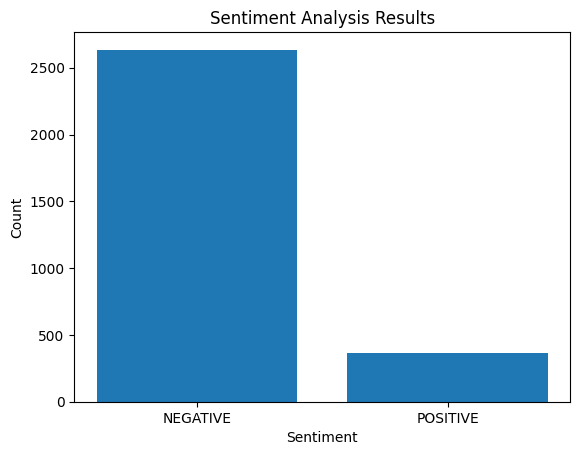

In [8]:
import spacy
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

# 加载数据
df = pd.read_csv('reviews.csv')

# 创建一个情感分析pipeline
nlp = pipeline('sentiment-analysis')

import multiprocessing as mp

def analyze_sentiment(text):
    return nlp(text)[0]['label']

with mp.Pool(mp.cpu_count()) as pool:
    df['sentiment'] = pool.map(analyze_sentiment, df['text'])

# 计算每种情感的数量
sentiment_counts = df['sentiment'].value_counts()

# 创建一个条形图
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')
plt.show()

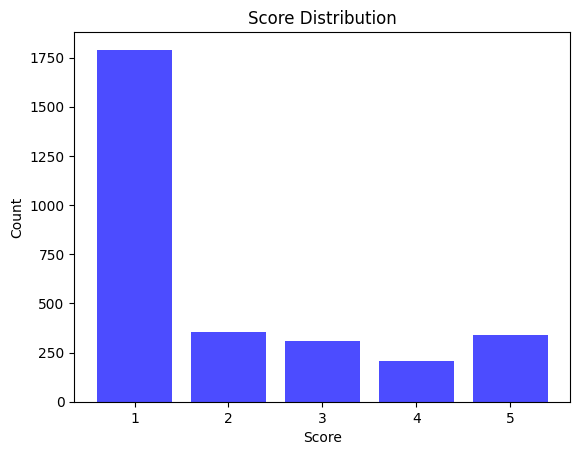

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('reviews.csv')

# 计算每个分数的数量
score_counts = df['score'].value_counts().sort_index()

# 创建一个条形图
plt.bar(score_counts.index, score_counts.values, color='blue', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score Distribution')
plt.xticks(range(1, 6))
plt.show()